In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
import estimate_critical_q as est_qc
import estimate_exponents as est_exps
import tools

## Notebook parameters

In [4]:
db_path = 'results_databases/bubble_filtering__8_neighbors_squared_network__MXU.csv'

In [5]:
# Read the physical quantities database
full_phys_quant = pd.read_csv(db_path, index_col=0)

In [6]:
# Values of the visibility parameter
#
vs = full_phys_quant.v.unique()[1:]

#### .
<br>
#### Go to the cell <a href='#..'>after the plots</a>
<br>
<br>

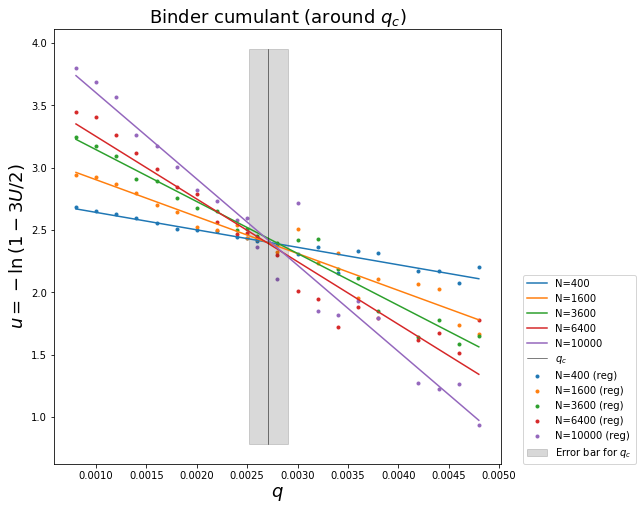


CRITICAL POINT

       q_c       = 0.00271139
       q_c error = 0.00019691



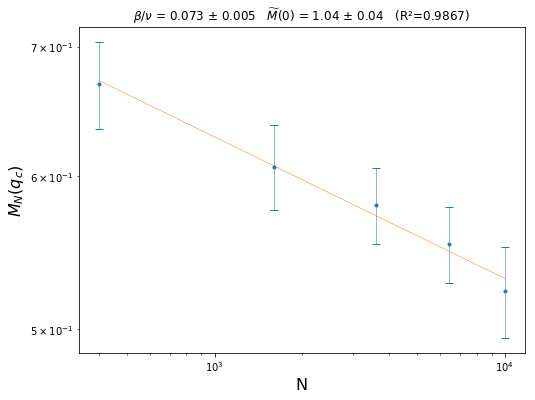

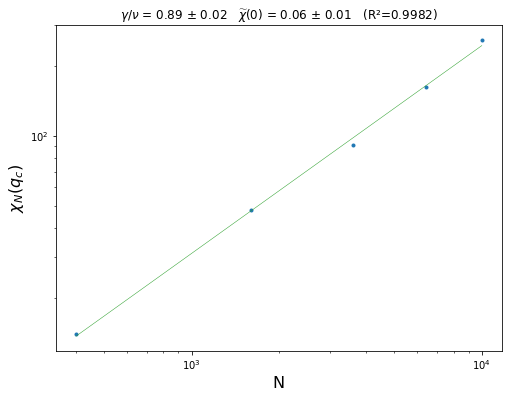

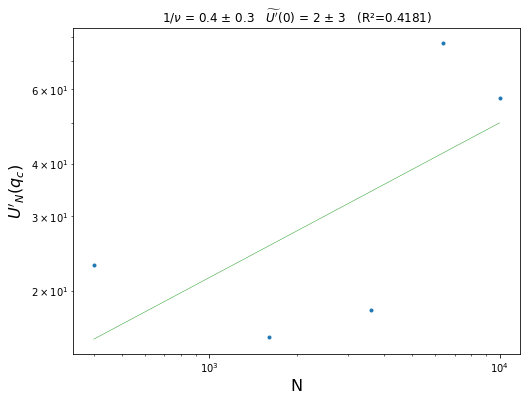

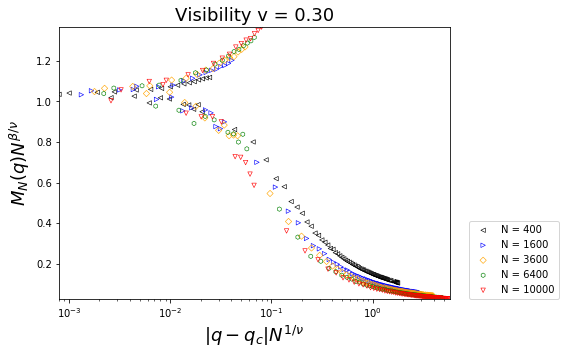

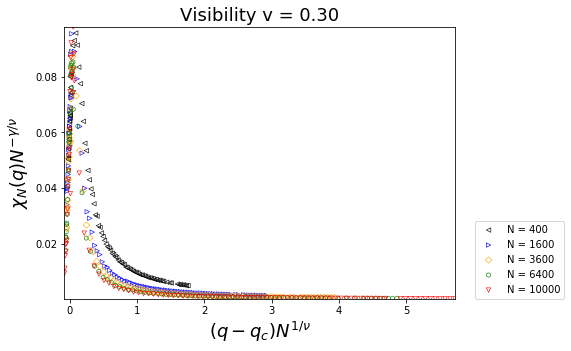

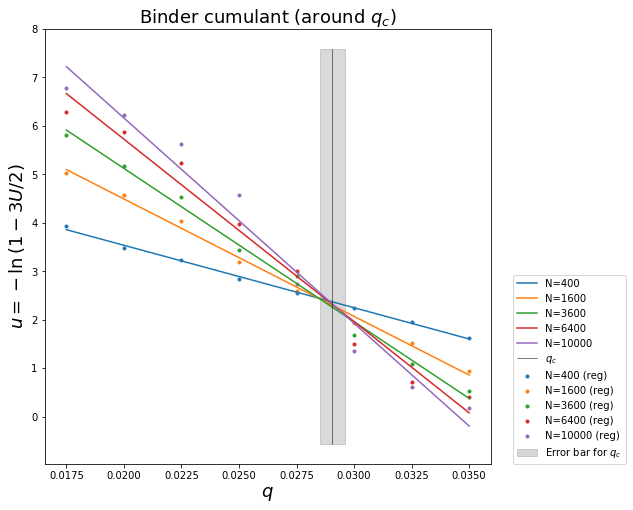


CRITICAL POINT

       q_c       = 0.02905032
       q_c error = 0.00053568



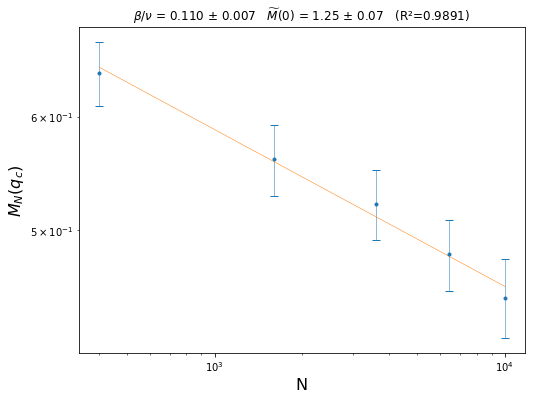

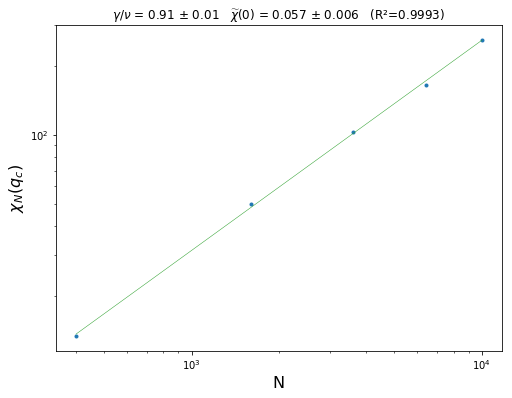

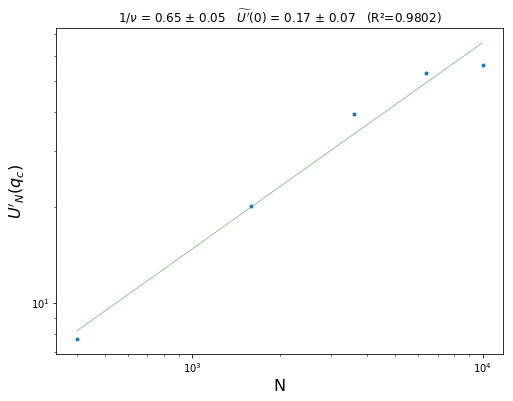

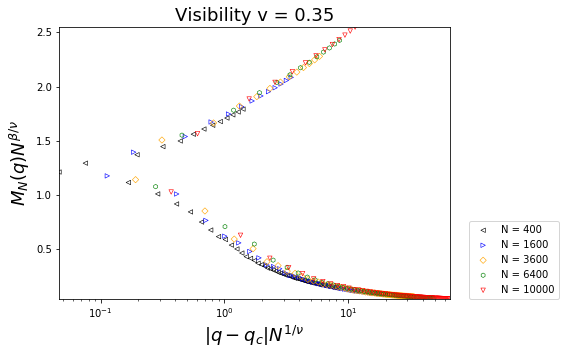

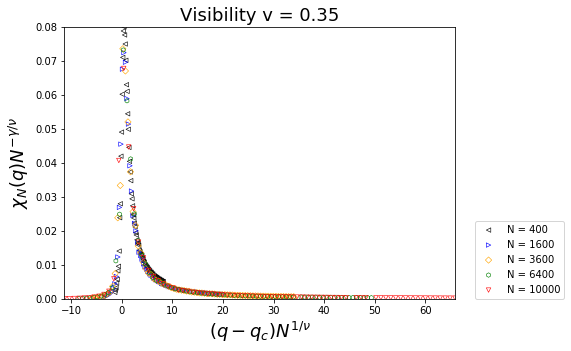

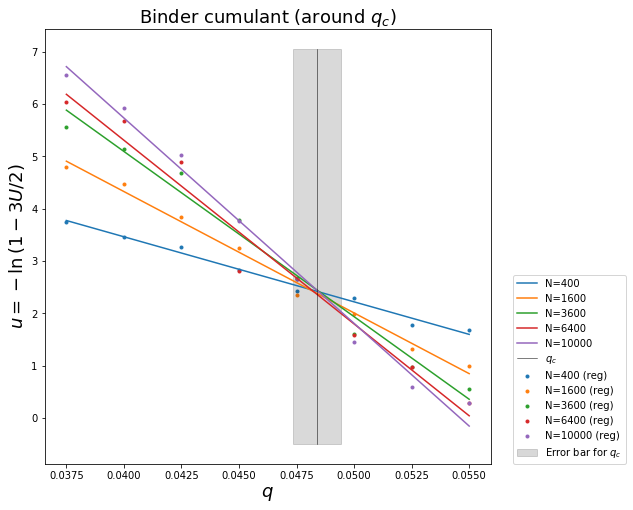


CRITICAL POINT

       q_c       = 0.04839485
       q_c error = 0.00104508



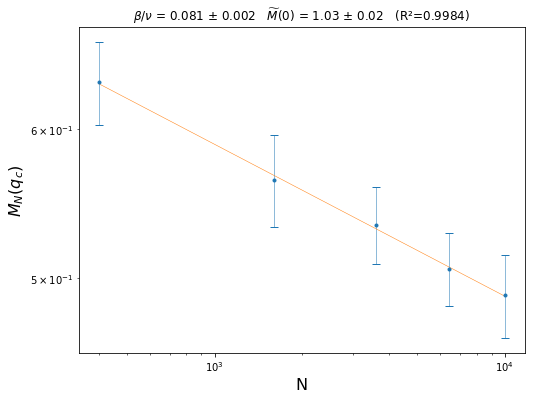

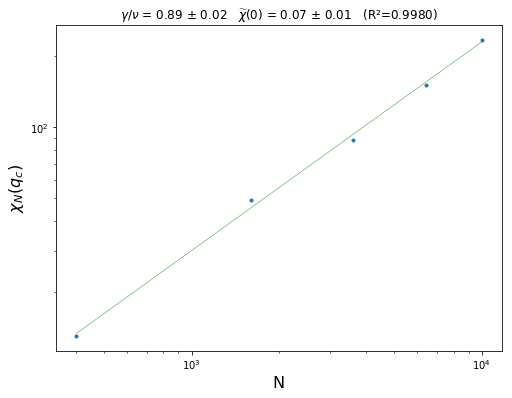

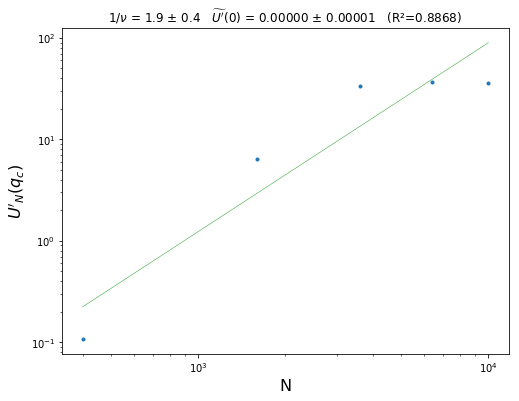

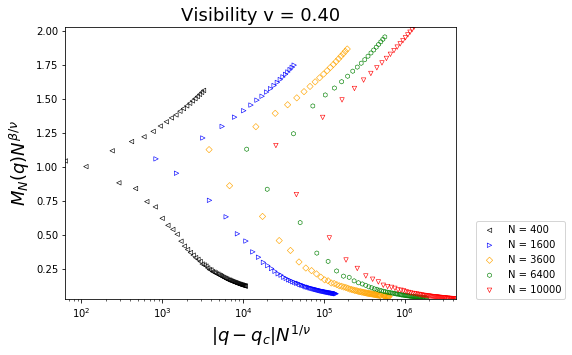

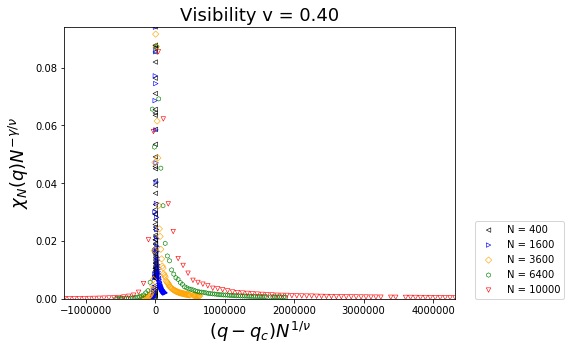

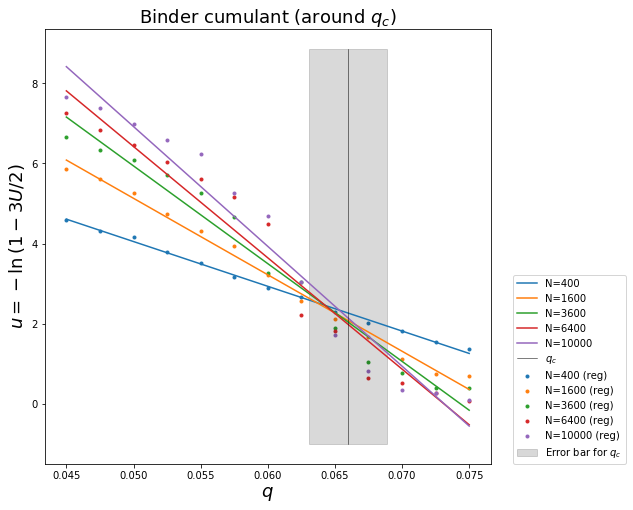


CRITICAL POINT

       q_c       = 0.06597590
       q_c error = 0.00290917



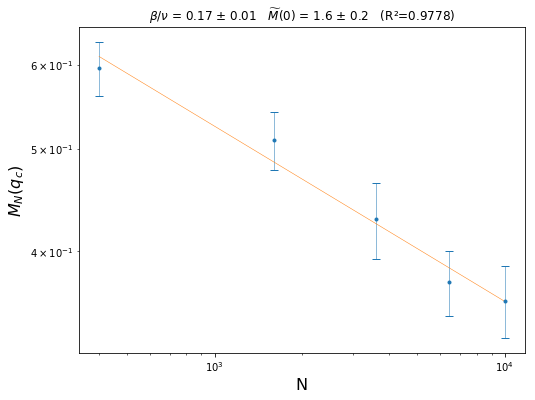

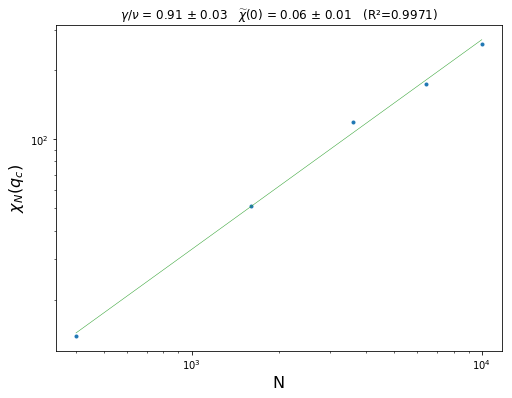

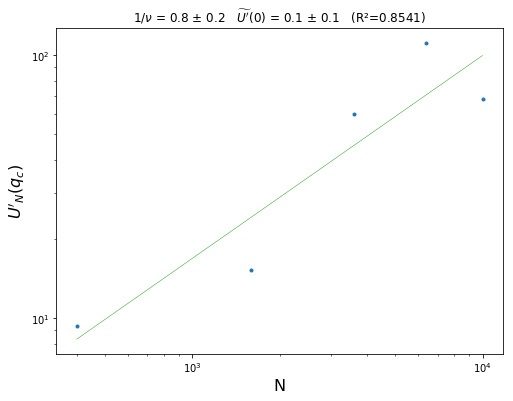

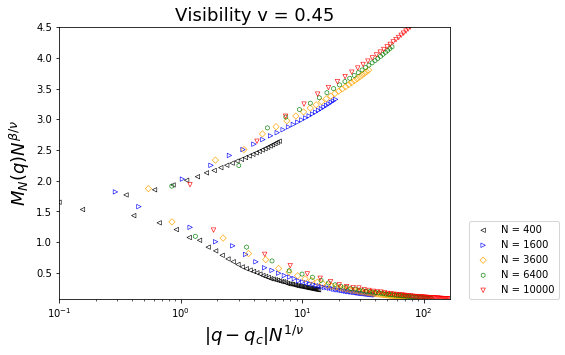

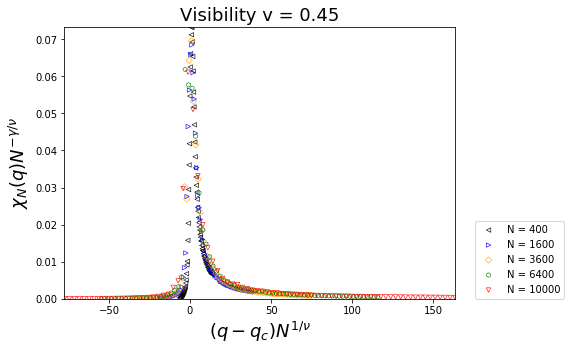

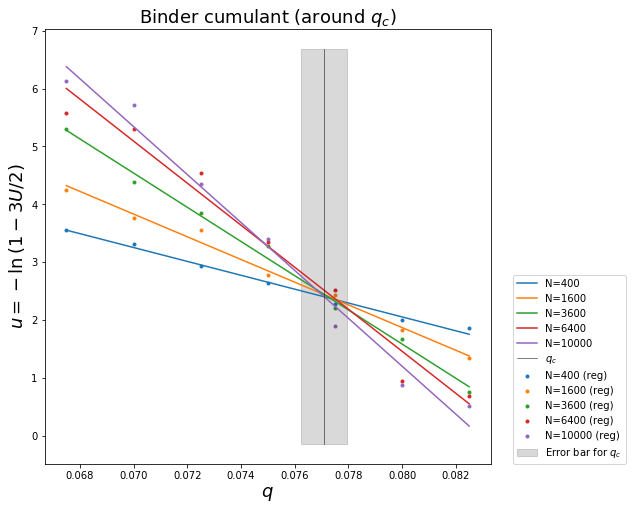


CRITICAL POINT

       q_c       = 0.07710638
       q_c error = 0.00086186



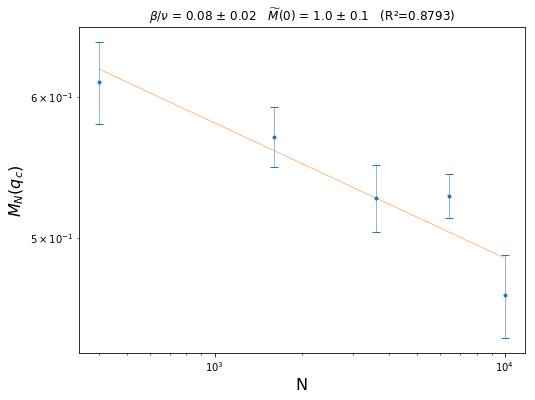

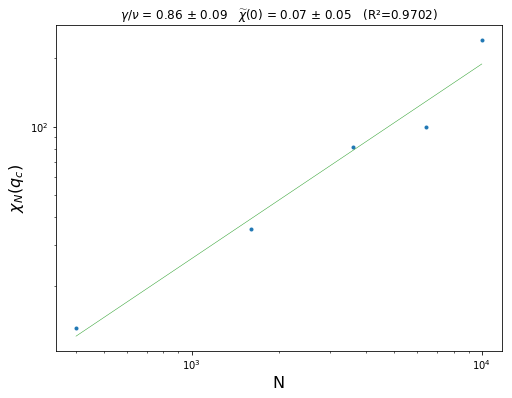

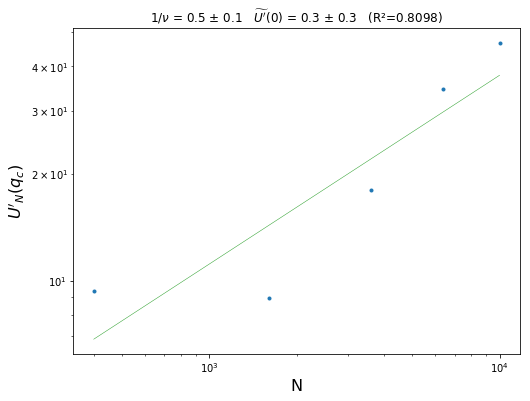

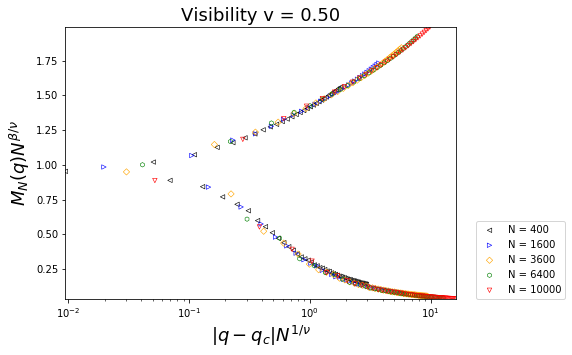

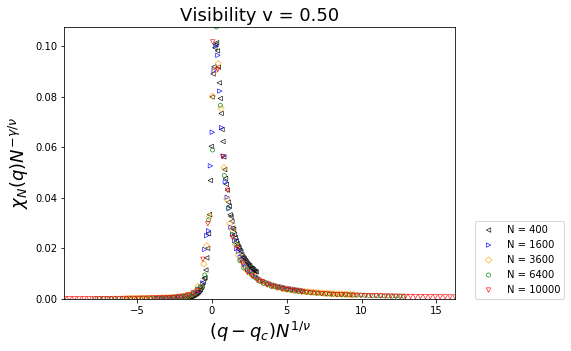

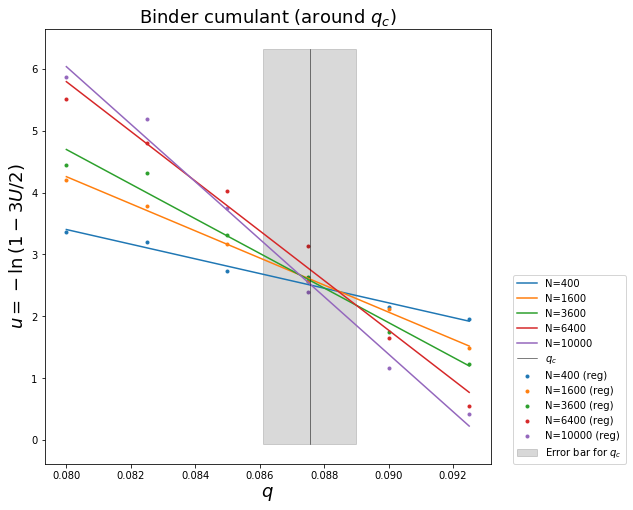


CRITICAL POINT

       q_c       = 0.08755081
       q_c error = 0.00144283



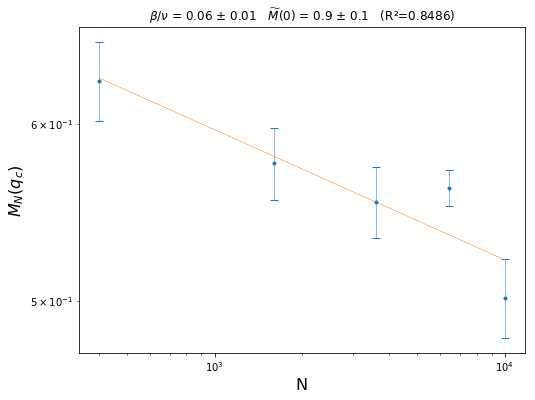

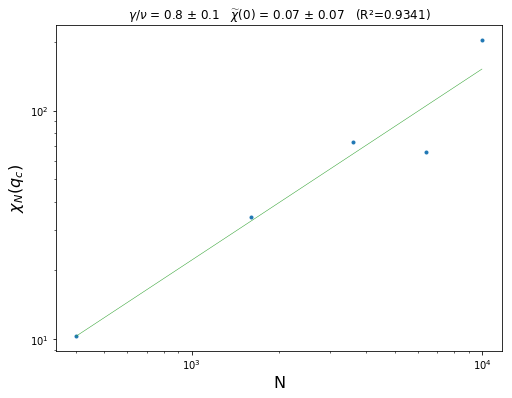

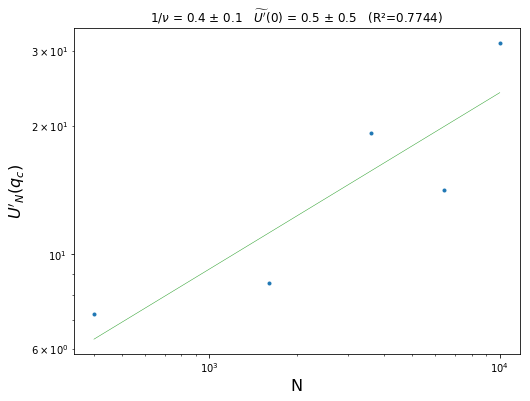

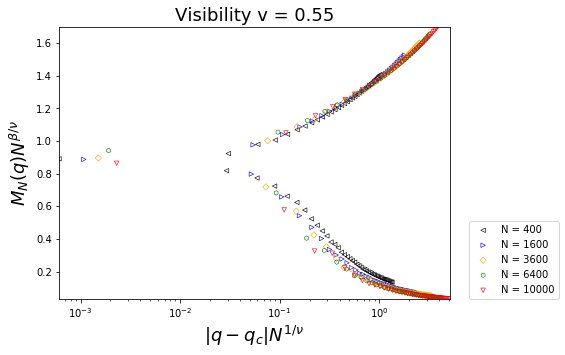

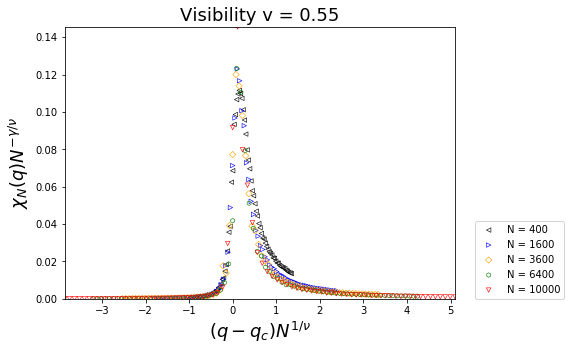

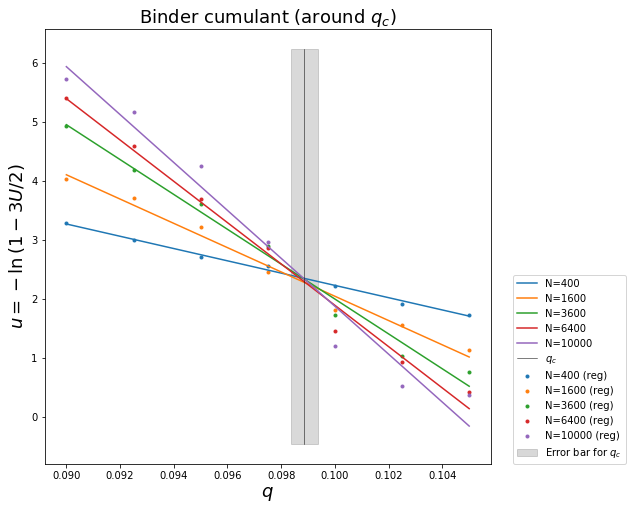


CRITICAL POINT

       q_c       = 0.09886689
       q_c error = 0.00050813



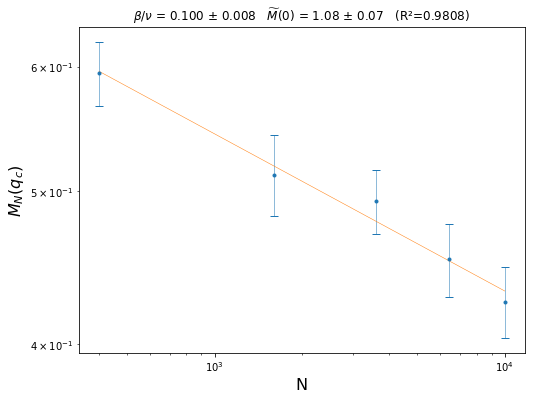

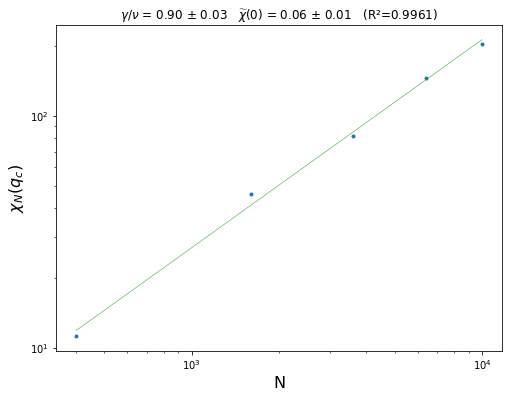

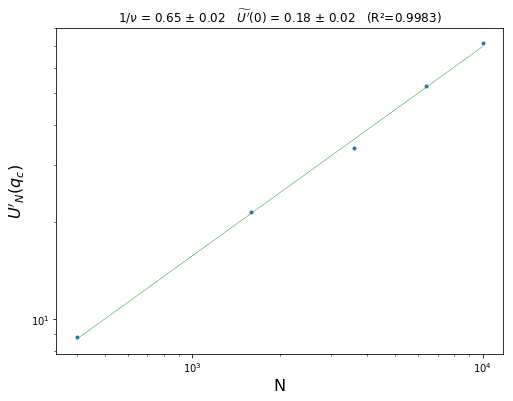

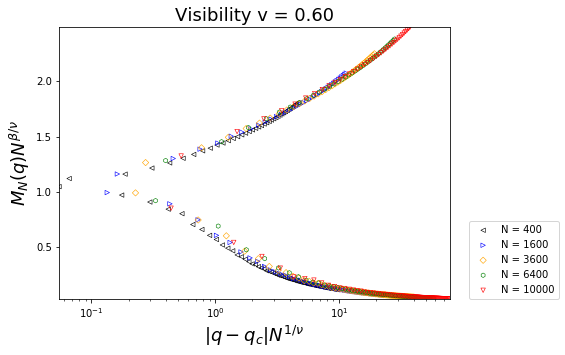

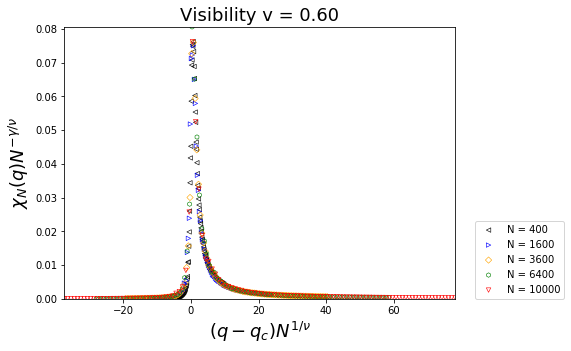

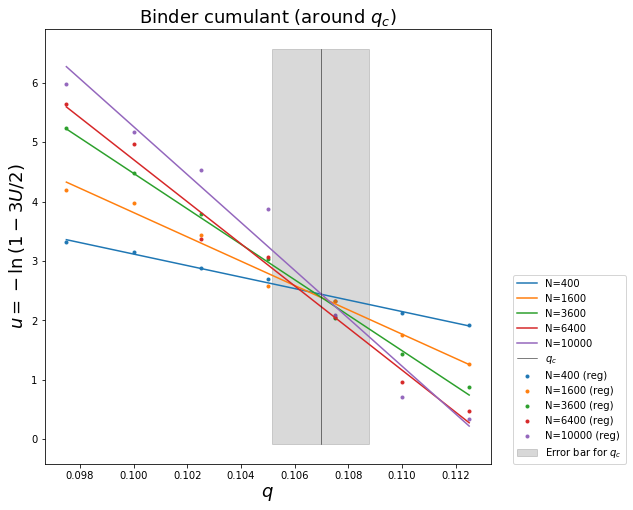


CRITICAL POINT

       q_c       = 0.10696853
       q_c error = 0.00181691



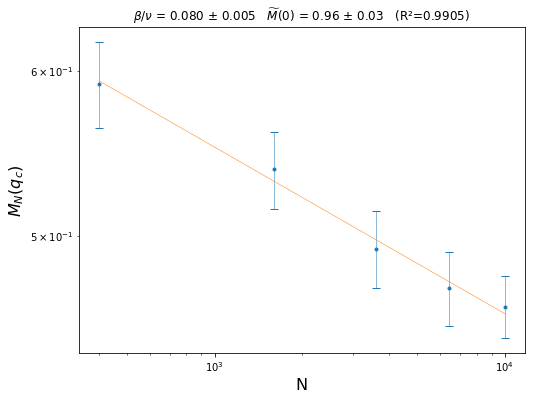

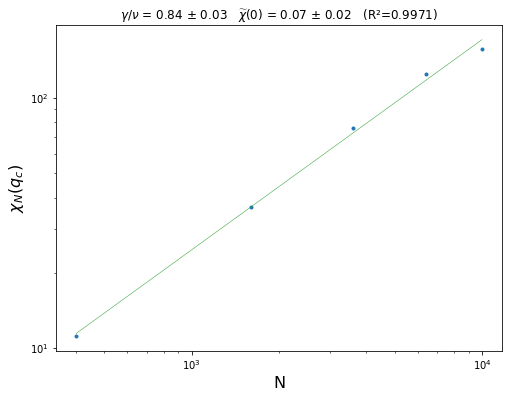

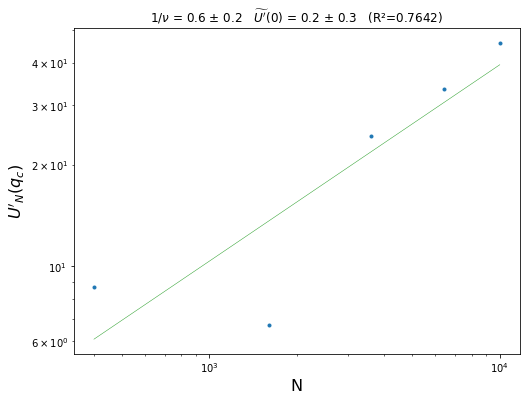

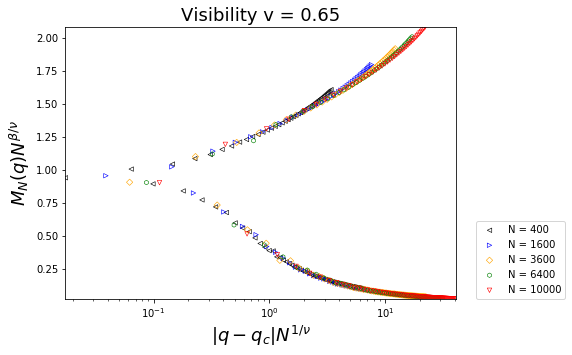

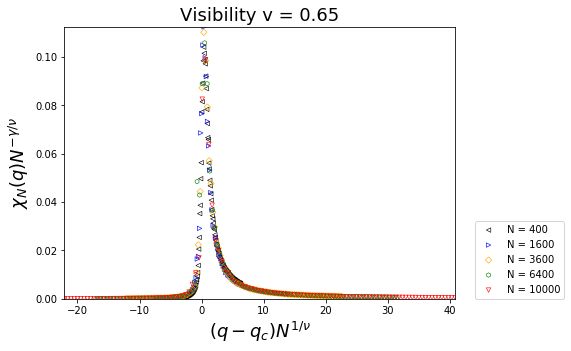

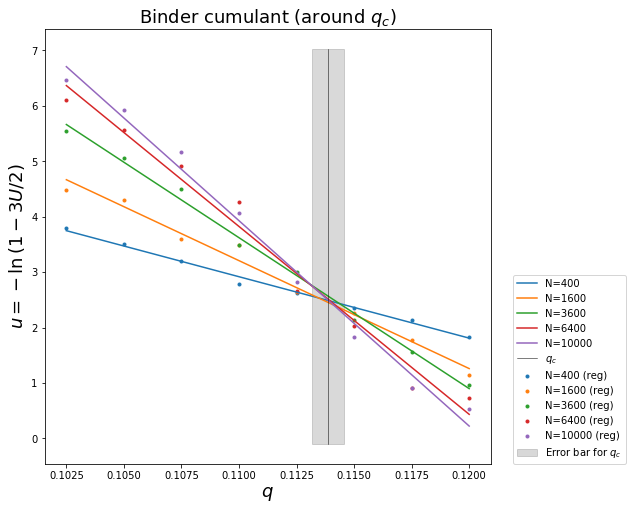


CRITICAL POINT

       q_c       = 0.11388586
       q_c error = 0.00069479



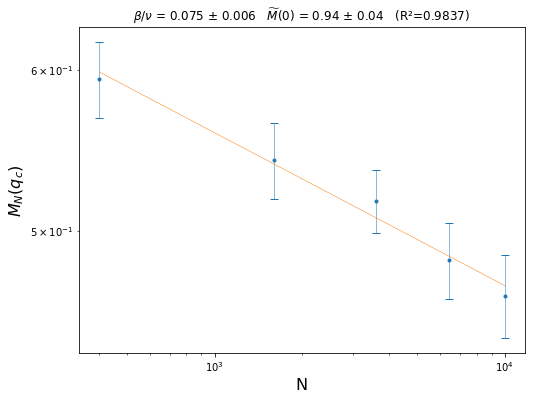

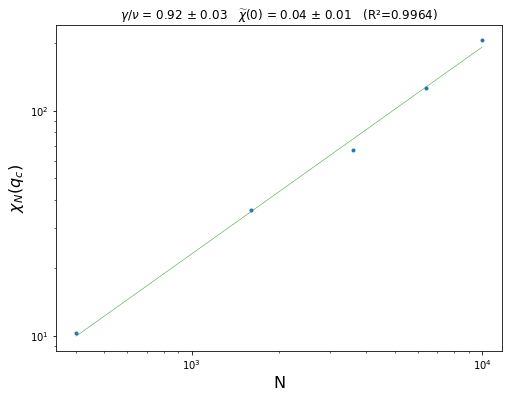

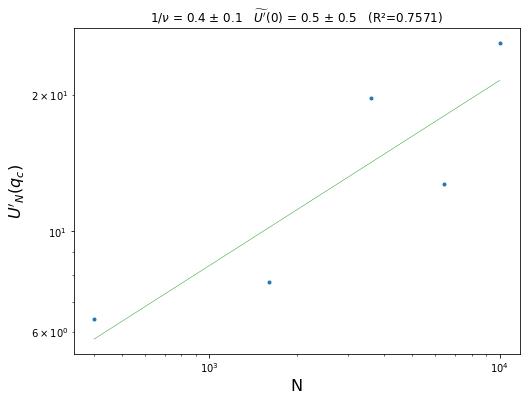

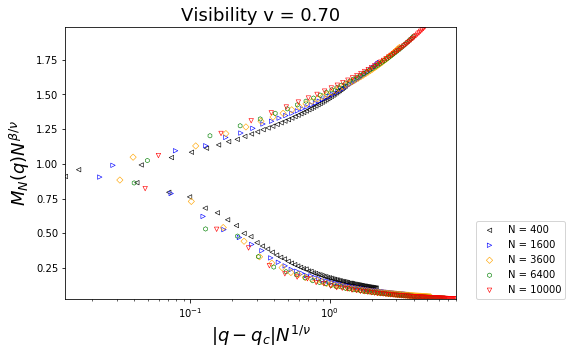

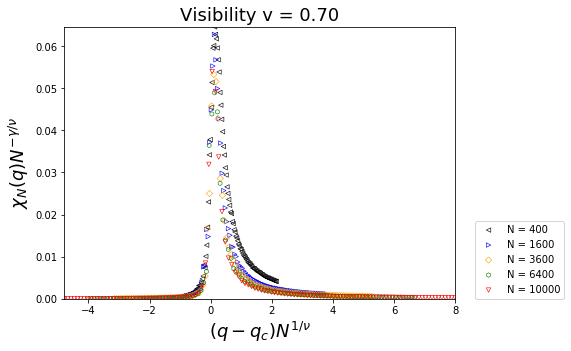

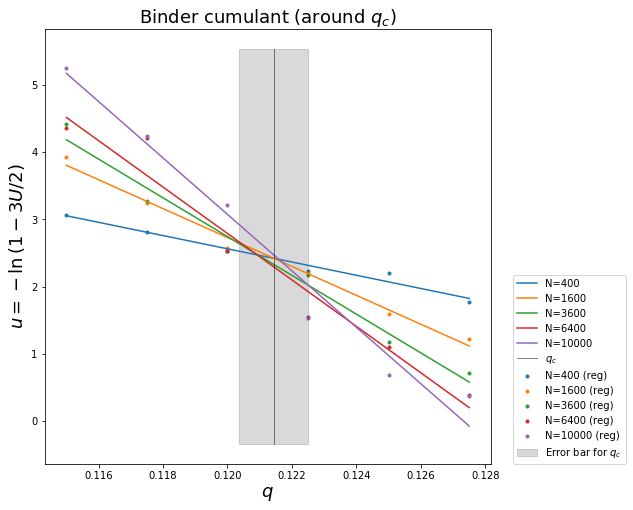


CRITICAL POINT

       q_c       = 0.12143689
       q_c error = 0.00106996



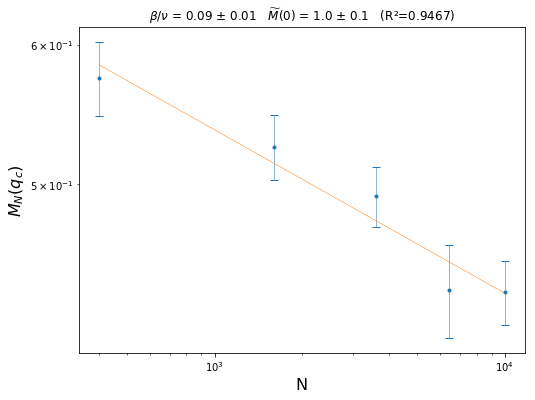

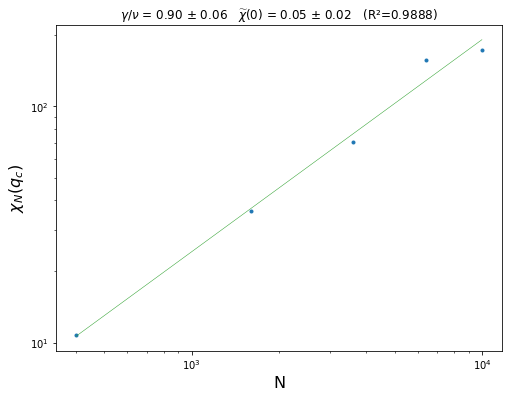

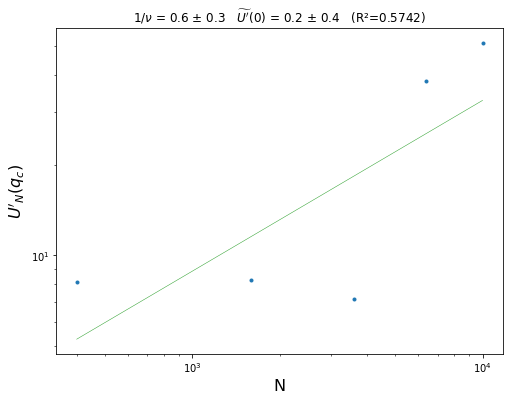

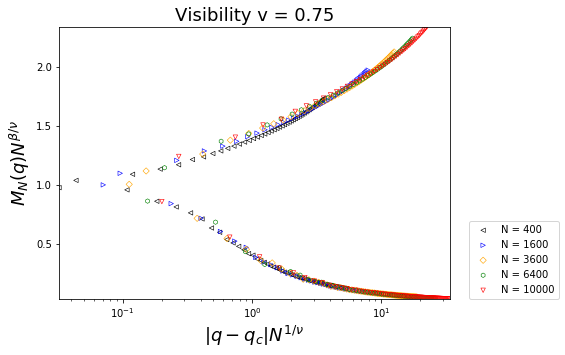

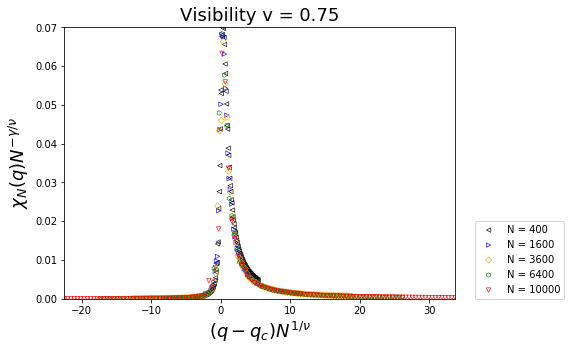

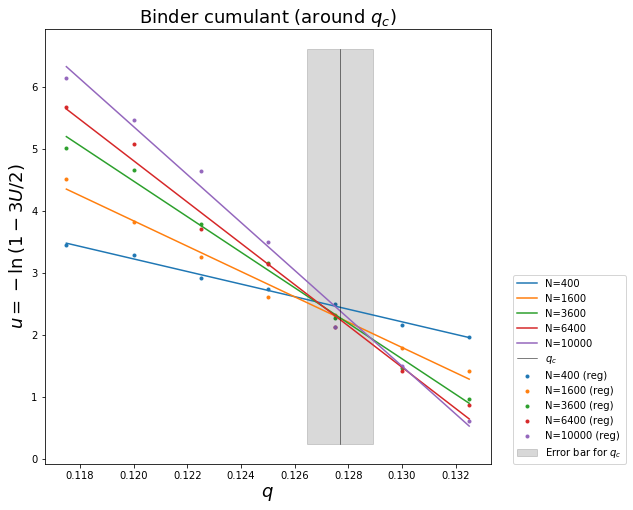


CRITICAL POINT

       q_c       = 0.12769547
       q_c error = 0.00122995



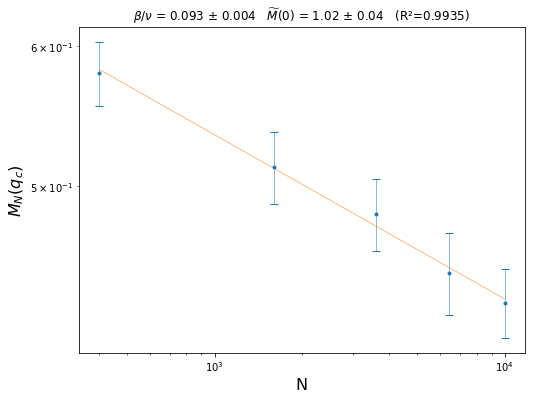

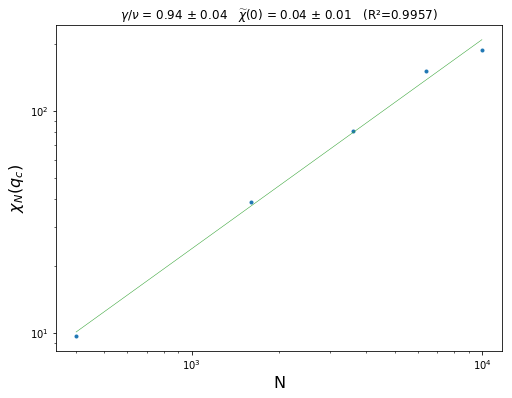

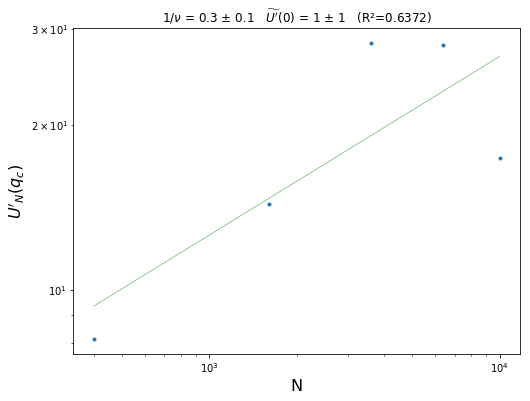

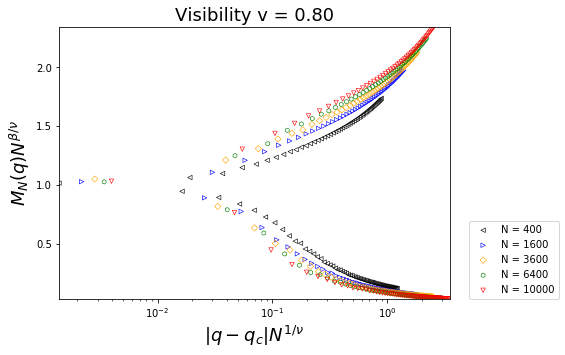

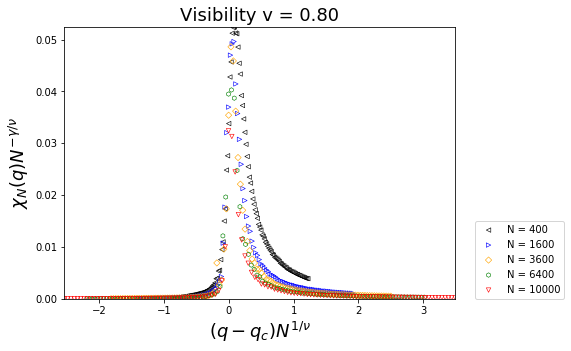

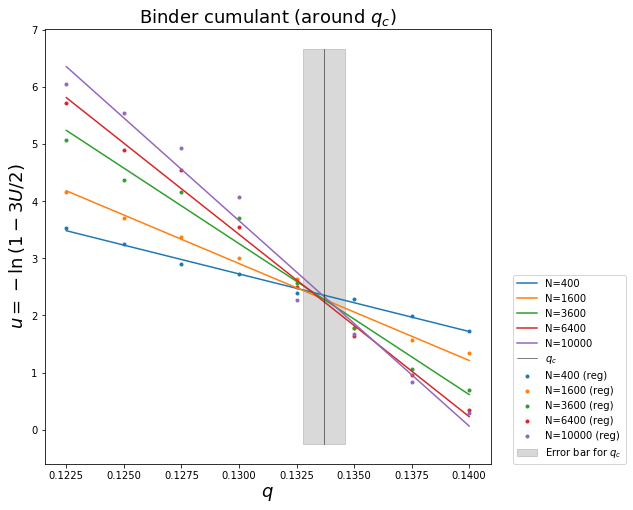


CRITICAL POINT

       q_c       = 0.13367996
       q_c error = 0.00091320



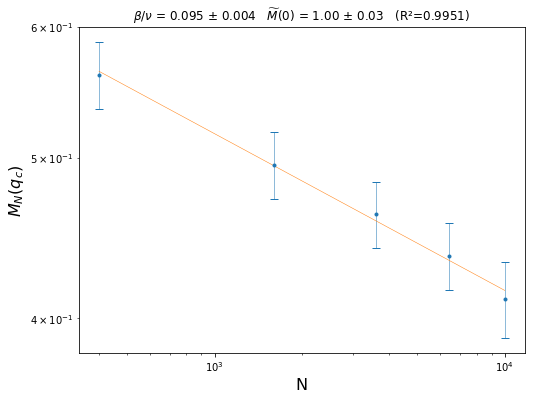

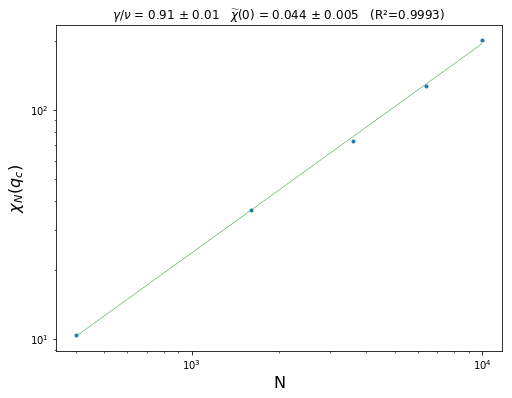

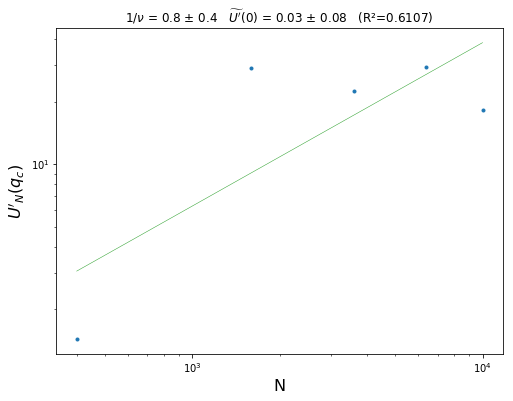

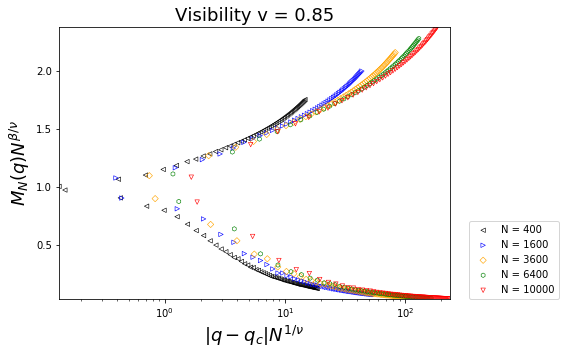

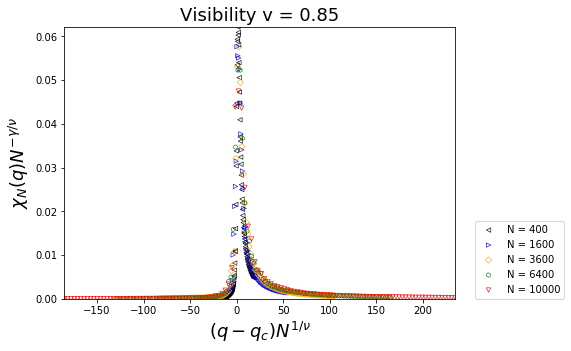

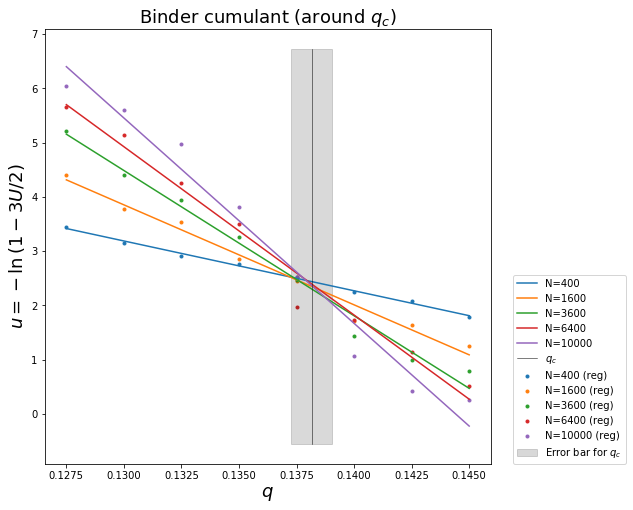


CRITICAL POINT

       q_c       = 0.13815652
       q_c error = 0.00089431



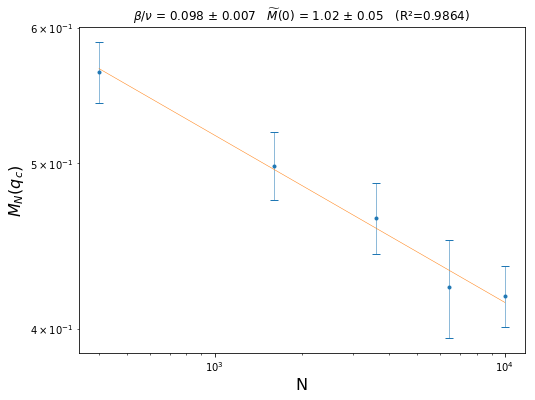

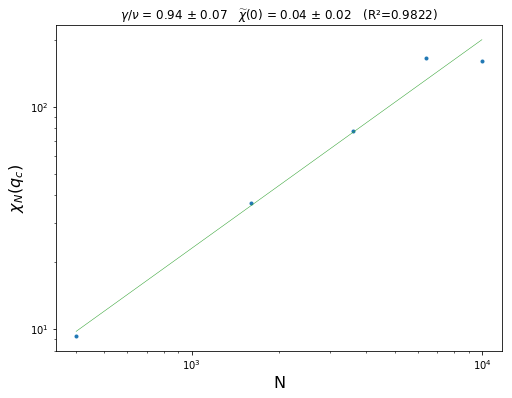

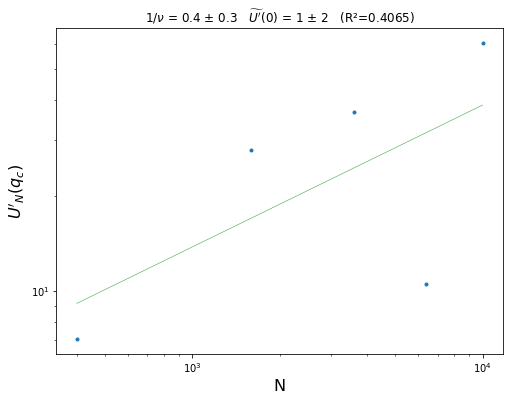

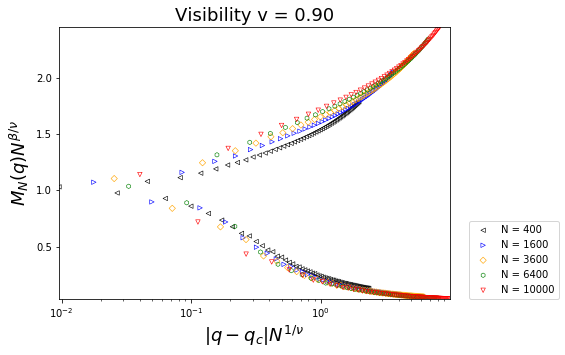

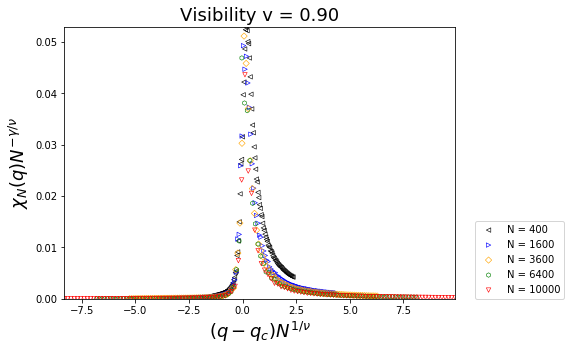

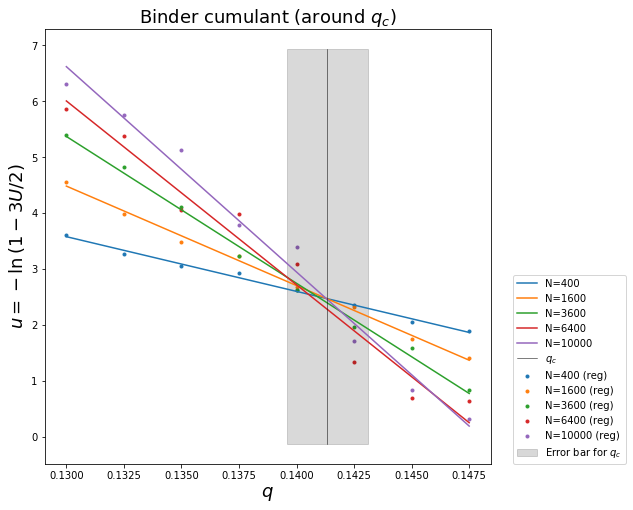


CRITICAL POINT

       q_c       = 0.14132816
       q_c error = 0.00175639



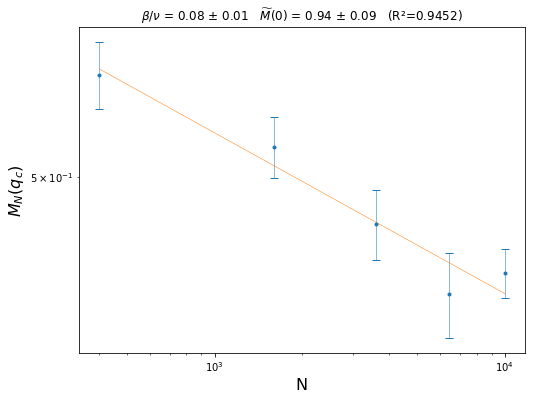

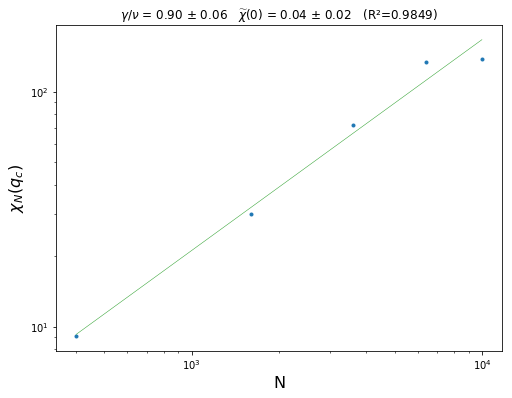

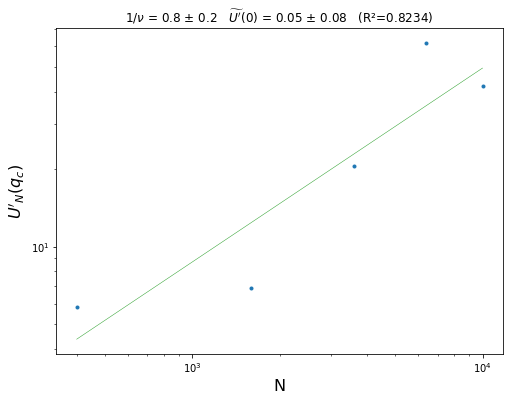

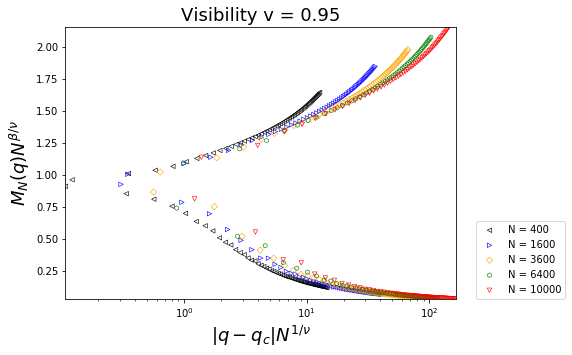

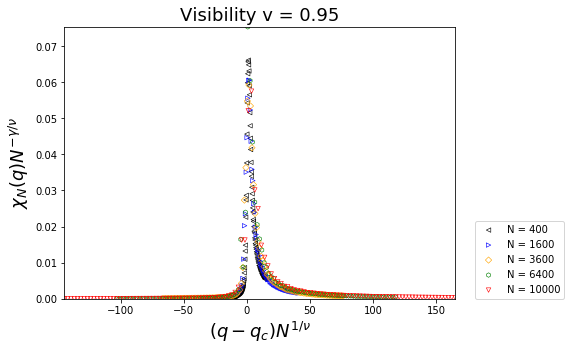

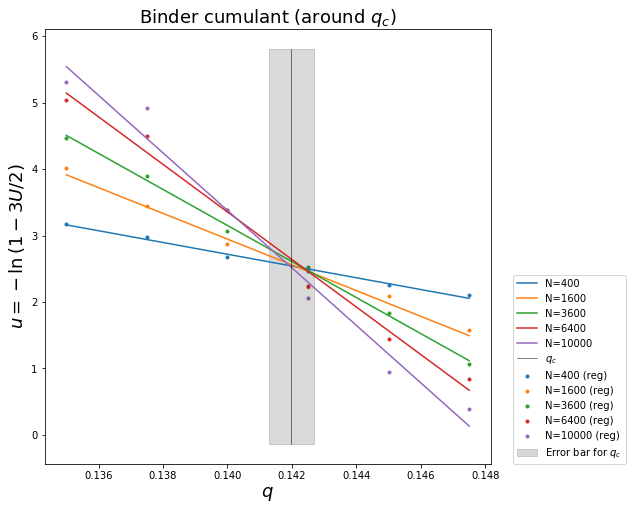


CRITICAL POINT

       q_c       = 0.14198322
       q_c error = 0.00069443



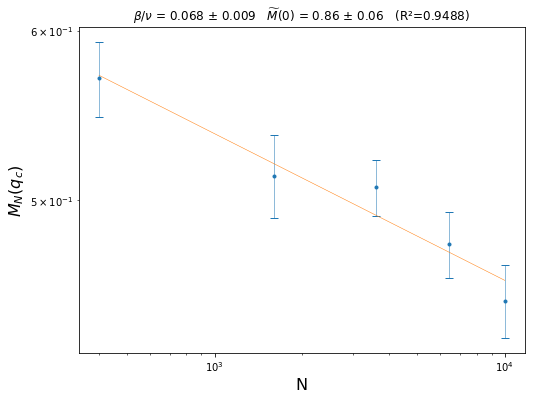

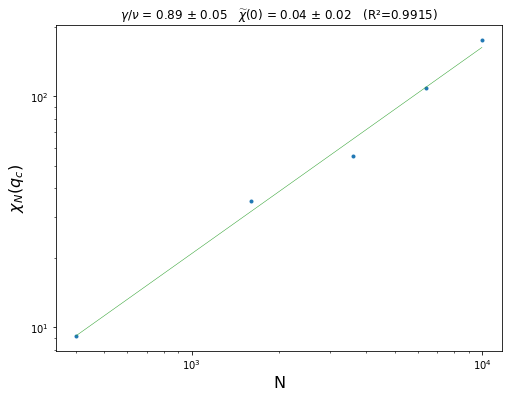

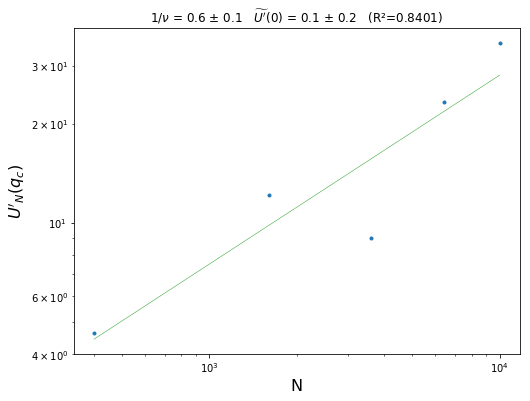

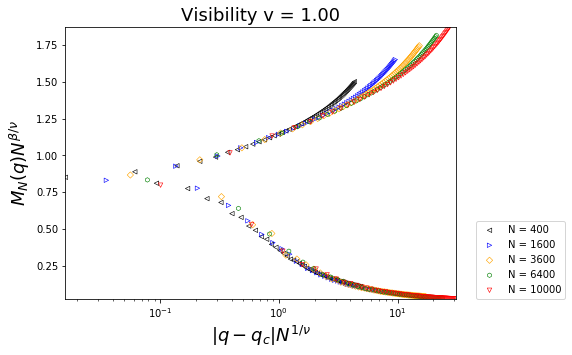

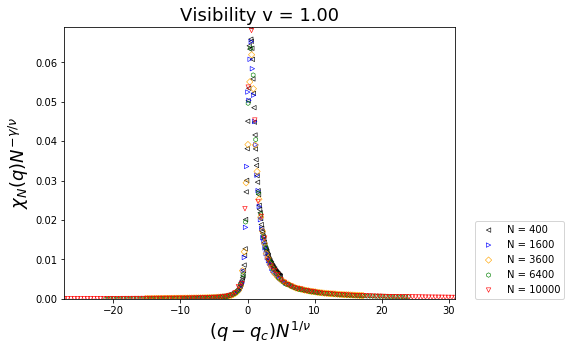

In [7]:
# Calculate the critical values for all values of visibility

critical_quantities = []

for v in vs:
    
    _ = []
    
    # Select the data corresponding to the given visibility v.
    phys_quant = full_phys_quant[full_phys_quant.v == v]
    
    # Get the number of sites
    N = full_phys_quant.N.unique()

    # Set the index to N and q
    phys_quant.set_index(['N','q'], inplace=True)
    
    # Estimate the critical q
    qc, qc_err, _1, _2 = est_qc.estimate(N, phys_quant, do_plot=True)
    
    #qc, qc_err = tools.express_measure_with_error(qc, qc_err)
    
    _.extend([qc, qc_err])
    
    # Estimate the critical exponents
    for x in ['beta_nu', 'gamma_nu', 'inv_nu']:
    
        exp, exp_err, y_til_0, y_til_0_err, reg_rsquared = est_exps.estimate_exponent(
                                    x, qc, N, phys_quant, do_plot=True)
        
        #exp, exp_err = tools.express_measure_with_error(exp, exp_err)
        #y_til_0, y_til_0_err = tools.express_measure_with_error(y_til_0, y_til_0_err)
        
        _.extend([exp, exp_err, y_til_0, y_til_0_err, reg_rsquared])
        
        
        if x == 'beta_nu':
            beta_nu = exp
            beta_nu_err = exp_err
            
        if x == 'gamma_nu':
            gamma_nu = exp
            gamma_nu_err = exp_err
            
        if x == 'inv_nu':
            inv_nu = exp
    
    # Estimate the effective dimension
    D, D_err = est_exps.estimate_D(beta_nu, beta_nu_err, gamma_nu, gamma_nu_err)
    
    #D, D_err = tools.express_measure_with_error(D, D_err)
        
    _.extend([D, D_err])
    
    # Do data collapse plots
    est_exps.data_collapse(qc, beta_nu, gamma_nu, inv_nu, N, phys_quant, 
                           plot_title = 'Visibility v = %.2f' % v)
    
    print('\n\n\n\n\n\n\n\n')
    print('============================================================================')
    print('\n\n\n\n\n\n\n\n')
    
    critical_quantities.append(_)
    
    
    
# Create an data frame to store the critical quantities 
# for each value of the visibility parameter.
cols = ['qc', 'qc_err', 
           'beta_nu', 'beta_nu_err', 'M_til_0', 'M_til_0_err', 'beta_nu_R2',
           'gamma_nu', 'gamma_nu_err', 'X_til_0', 'X_til_0_err', 'gamma_nu_R2',
           'inv_nu', 'inv_nu_err', 'dU_til_0', 'dU_til_0_err', 'inv_nu_R2',
           'D', 'D_err'
          ]

critical_quantities = pd.DataFrame(columns=cols, data=critical_quantities, index=vs)

#### ..
<br>
#### Go to the cell <a href='#.'>before the plots</a>
<br>
<br>

In [8]:
def plot_v_dep(var, var_err):
    plt.figure(figsize=(8,6))

    critical_quantities[var].plot(lw=0.5, color='black')
    inf_l = critical_quantities[var] - critical_quantities[var_err]
    sup_l = critical_quantities[var] + critical_quantities[var_err]
    plt.fill_between(critical_quantities.index, inf_l, sup_l, alpha=0.5, color='orange')

    plt.xlabel('v', fontsize=16)
    plt.ylabel(var, fontsize=16)

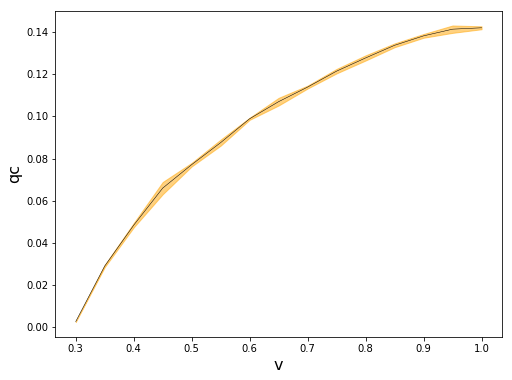

In [9]:
plot_v_dep('qc', 'qc_err')

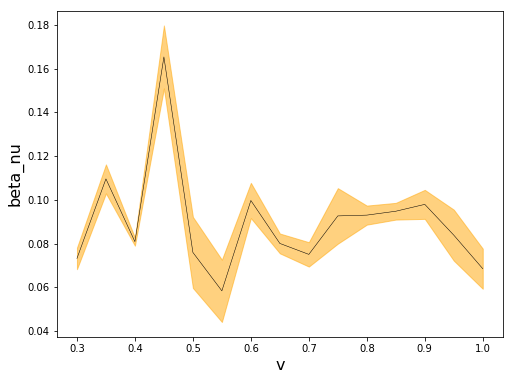

In [10]:
plot_v_dep('beta_nu', 'beta_nu_err')

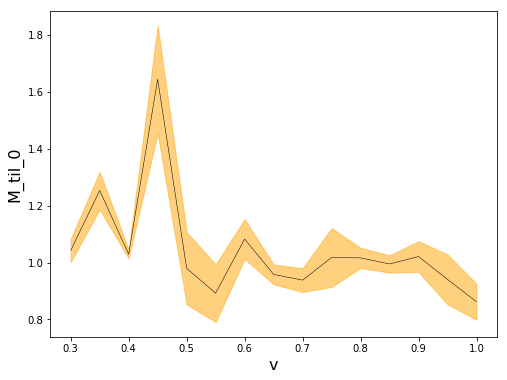

In [11]:
plot_v_dep('M_til_0', 'M_til_0_err')

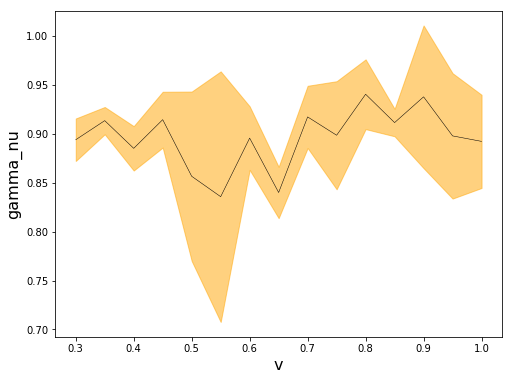

In [12]:
plot_v_dep('gamma_nu', 'gamma_nu_err')

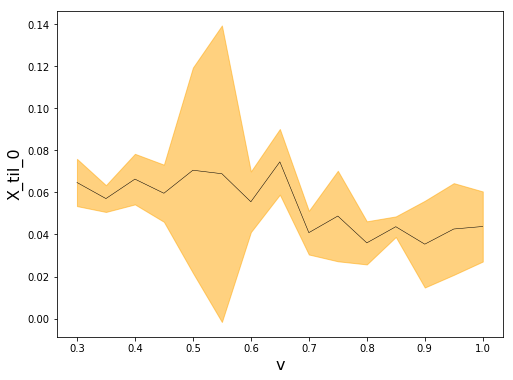

In [13]:
plot_v_dep('X_til_0', 'X_til_0_err')

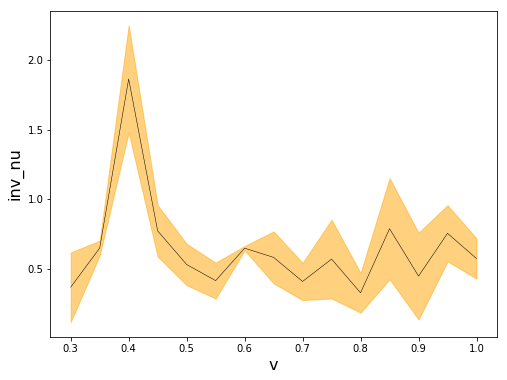

In [14]:
plot_v_dep('inv_nu', 'inv_nu_err')

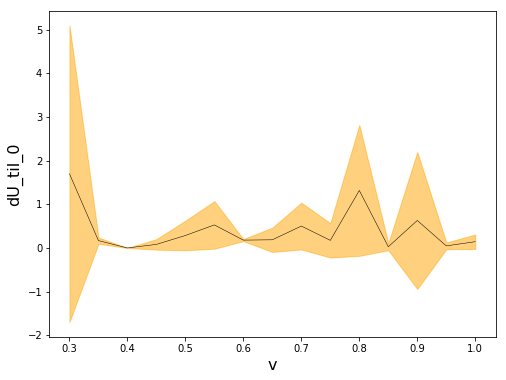

In [15]:
plot_v_dep('dU_til_0', 'dU_til_0_err')

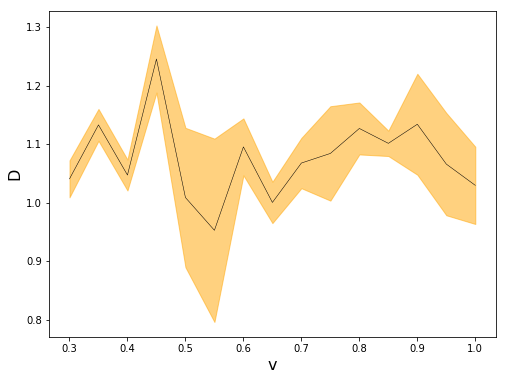

In [16]:
plot_v_dep('D', 'D_err')

In [17]:
critical_quantities

,qc,qc_err,beta_nu,beta_nu_err,M_til_0,M_til_0_err,beta_nu_R2,gamma_nu,gamma_nu_err,X_til_0,X_til_0_err,gamma_nu_R2,inv_nu,inv_nu_err,dU_til_0,dU_til_0_err,inv_nu_R2,D,D_err
0.30,0.002711,0.000197,0.073183,0.004911,1.042404,0.040895,0.986668,0.894119,0.021742,0.064770,0.011249,0.998229,0.367082,0.250008,1.700047,3.395009,0.418136,1.040485,0.031565
0.35,0.029050,0.000536,0.109564,0.006628,1.253522,0.066361,0.989142,0.913662,0.013963,0.057100,0.006368,0.999300,0.648052,0.053193,0.168406,0.071555,0.980188,1.132791,0.027218
0.40,0.048395,0.001045,0.080859,0.001847,1.029965,0.015196,0.998437,0.885320,0.022708,0.066366,0.012038,0.998030,1.863624,0.384433,0.000003,0.000010,0.886794,1.047038,0.026402
0.45,0.065976,0.002909,0.165345,0.014381,1.645398,0.189010,0.977809,0.914669,0.028551,0.059641,0.013602,0.997086,0.771591,0.184140,0.081827,0.120357,0.854072,1.245358,0.057313
0.50,0.077106,0.000862,0.075937,0.016246,0.979972,0.127171,0.879267,0.856743,0.086650,0.070599,0.048864,0.970227,0.530290,0.148385,0.285773,0.338717,0.809786,1.008617,0.119142
0.55,0.087551,0.001443,0.058367,0.014234,0.892636,0.101491,0.848592,0.835870,0.128185,0.068936,0.070584,0.934096,0.414291,0.129094,0.527786,0.544240,0.774420,0.952603,0.156653
0.60,0.098867,0.000508,0.099696,0.008061,1.082895,0.069728,0.980764,0.895795,0.032523,0.055579,0.014439,0.996061,0.647371,0.015436,0.179659,0.022152,0.998297,1.095187,0.048646
0.65,0.106969,0.001817,0.080051,0.004532,0.958536,0.034696,0.990478,0.840129,0.026237,0.074594,0.015633,0.997083,0.581386,0.186453,0.186890,0.278343,0.764202,1.000232,0.035301
0.70,0.113886,0.000695,0.075044,0.005581,0.938378,0.041832,0.983679,0.917474,0.031846,0.040876,0.010398,0.996399,0.408226,0.133504,0.501316,0.534602,0.757087,1.067562,0.043007
0.75,0.121437,0.001070,0.092636,0.012696,1.017967,0.103236,0.946655,0.898715,0.055276,0.048787,0.021541,0.988779,0.569004,0.282882,0.173842,0.392812,0.574224,1.083988,0.080668


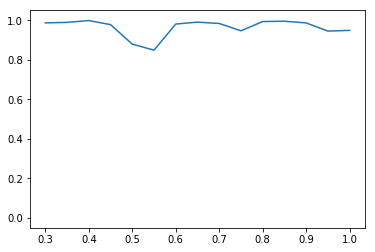

In [18]:
critical_quantities.beta_nu_R2.plot()
plt.ylim(-0.05,1.05);

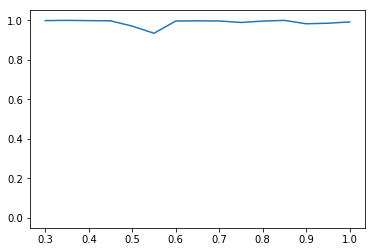

In [19]:
critical_quantities.gamma_nu_R2.plot()
plt.ylim(-0.05,1.05);

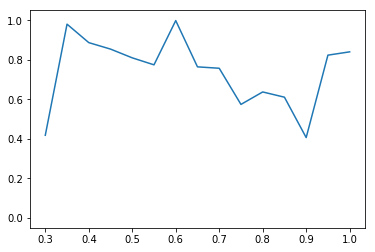

In [20]:
critical_quantities.inv_nu_R2.plot()
plt.ylim(-0.05,1.05);